In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

# import os

# # !pip install fire
# # !pip install tqdm

# home_dir = '/content/gdrive/My Drive/A0/aispace'
# os.chdir(home_dir)
# !pwd

# import os
# # Get the current working directory
# current_directory = os.getcwd()
# print(current_directory)

# import shutil
# import os

In [3]:
# !pip install rasterio
# !pip install accelerate
# !pip install peft
# !pip install transformers
# # !pip install transformers==4.34.0
# !pip install datasets

In [4]:
import evaluate
print(evaluate.__version__)
# fn

0.4.1


In [5]:
KAGGLE = False
if KAGGLE == True:
    # Define the input and output directories
    input_directory  = '/kaggle/input/begreat'  # Replace with the path to your input directory
    output_directory = '/kaggle/working'  # Replace with the path to your output directory

    def input_copy(input_directory, output_directory):
        # Get a list of files in the input directory
        files_to_copy = os.listdir(input_directory)
        # Iterate through the files and copy them to the output directory
        for file_name in files_to_copy:
            # Create the full paths for the source and destination
            source_file = os.path.join(input_directory, file_name)
            destination_file = os.path.join(output_directory, file_name)

            # Copy the file from the source to the destination
            shutil.copy(source_file, destination_file)

        # Get a list of files in the input directory
        files = os.listdir(output_directory)
        print(files)

    input_copy(input_directory, output_directory)

    source_directory  = '/kaggle/input/'  # Replace with the path to your input directory
    destination_directory = '/kaggle/working/input'  # Replace with the path to your output directory

    # Copy the source directory to the destination directory
    shutil.copytree(source_directory, destination_directory)

    input_copy(input_directory, output_directory)

In [6]:
import numpy as np

import great
from great import GReaT

import pandas as pd

################################
import numpy as np

import pandas as pd

# all imports should go here

import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

import sklearn
from sklearn.model_selection import train_test_split

import skimage.exposure

# access package for AWS access
# import boto3

import sys
import os
import subprocess
import datetime
import platform
import datetime

from tqdm import tqdm

# import ee
import h5py
import numpy as np
from datetime import datetime, timedelta  # Import timedelta here
import random
import pandas as pd

import time
import rasterio as rio
################################

from hlsdataset import HLSDataSet

import shutil

# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [7]:
MODEL_NAME = 'distilgpt2'
# MODEL_NAME = 'gpt2-large'

In [8]:
class HLSInference(HLSDataSet):
    def __init__(self, doy=211, table_dtype = 'float16', path='./aispace/data/L8-100x100'):
        super().__init__(table_dtype = table_dtype, path=path)
        # self.model = model
        self.doy_to_impute = doy

        self.imputed_data = None
        self.recovered_data = None

        self.imputed_file = ''

        # self.nan_data = self.to_impute #.copy()    # to_impute.copy()
        # display(self.nan_data)
        #### for only one day processing ###########################
        self.nan_data_doy = None # self.nan_data.loc[(self.nan_data['DOY'] == doy)]
        self.nan_data_doy = None #  self.nan_data_doy.reset_index(drop=True)

        self.data_doy = None #  self.clear_data.loc[(self.clear_data['DOY'] == doy)]
        self.data_doy = None #  self.data_doy.reset_index(drop=True)

        # self.nan_data_resid  = self.nan_data.loc[(nan_data['DOY'] != doy)]
        # self.nan_data_resid  = self.nan_data_resid.reset_index(drop=True)

    def _impute(self, model, columns_impute=['PID', 'DOY', 'B02', 'B03', 'B04'], device='cuda', k=400, max_length=1000, temperature=0.01):
    # def _impute(self, model, columns_impute=['B02', 'B03', 'B04', 'X', 'Y', 'DOY'], device='cuda', k=400, max_length=1000, temperature=0.01):

        self.nan_data_doy = self.to_impute.loc[(self.to_impute['DOY'] == self.doy_to_impute)]
        self.nan_data_doy = self.nan_data_doy.reset_index(drop=True)

        self.data_doy = self.clear_data.loc[(self.clear_data['DOY'] == self.doy_to_impute)]
        self.data_doy = self.data_doy.reset_index(drop=True)

        # print(f'to impute data:')
        # display(self.nan_data_doy)
        print(f'to impute data:')
        display(self.nan_data_doy)
        display(self.data_doy)

        # fn         

        print(f'NumPy version:{np.__version__}')
        np.float = float

        # Get the DataFrame with columns in reverse order
        # self.nan_data_doy = self.nan_data_doy[self.nan_data_doy.columns[::-1]].copy()

        ######################### ORIGINAL ##############################################################
        _impute = self.nan_data_doy[columns_impute].copy()
        # _impute[['DOY', 'PID']] = _impute[['DOY', 'PID']].astype(int)
        print('IMPUTE:')
        display(_impute)
        # self.imputed_data = pd.read_csv('imputed.csv')
        self.imputed_data = model.impute(_impute, k=k, max_length=max_length, temperature=temperature, device=device)
        self.imputed_data.to_csv('imputed2.csv')

        print('IMPUTED:')
        display(self.imputed_data)
        #########################################################################################
        # ################################## FOR BANDS in ONE BAND#####################################################
        # # _impute = self.nan_data_doy[columns_impute].copy()
        # _impute = self.nan_data_doy[columns_impute].copy()
        # _impute[['PID', 'DOY', 'BAND']] = self.nan_data_doy[['PID', 'DOY', 'B03']].copy()
        # _impute = _impute[['PID', 'DOY', 'BAND']].copy()
        # print('IMPUTE:')
        # display(_impute)
        # # self.imputed_data = pd.read_csv('imputed.csv')
        # self.imputed_data = model.impute(_impute, k=k, max_length=max_length, temperature=temperature, device=device)
        # self.imputed_data.to_csv('imputed2.csv')

        # print('IMPUTED:')
        # display(self.imputed_data)

        # # # Inverse operation: Split 'BAND' column back into individual columns
        # aa = self.nan_data_doy[columns_impute].copy()
        # display(aa)
        
        # # aa[['B02', 'B03', 'B04', 'NN']]  
        # aa = self.imputed_data['BAND'].str.split(';', expand=True)
        # display(aa)
        
        # self.imputed_data[['B02', 'B03', 'B04', 'NN']] = self.imputed_data['BAND'].str.split(';', expand=True)

        # # # Convert columns back to their original data types
        # self.imputed_data[['B02', 'B03', 'B04']] = self.imputed_data[['B02', 'B03', 'B04']].astype(table_dtype)

        # print('IMPUTED:')
        # display(self.imputed_data)
        # #########################################################################################
        
        # imputed_file = f'A0[optim_sophia]/imputed_output_run[3].csv'
        # self.imputed_data = pd.read_csv(imputed_file)
        # self.imputed_data = self.nan_data_doy.copy()

        print(self.nan_data_doy.columns, self.imputed_data.columns)
        print(self.nan_data_doy.shape, self.imputed_data.shape)

        # Merge the dataframes by X and Y columns and replace B3 in df1 with B3 from df2
        merged_df = self.nan_data_doy.merge(self.imputed_data, on=['PID', 'DOY'], suffixes=('', '_df2'), how='left')  
        # Replace the original B3 column with B3 from df2
        merged_df['B02'] = merged_df['B02_df2']
        merged_df['B03'] = merged_df['B03_df2']
        merged_df['B04'] = merged_df['B04_df2']
        
        # Drop the additional B3_df2 column
        merged_df = merged_df.drop('B02_df2', axis=1)
        merged_df = merged_df.drop('B03_df2', axis=1)
        merged_df = merged_df.drop('B04_df2', axis=1)

        self.imputed_data = merged_df.copy()
        
        print(self.nan_data_doy.columns, self.imputed_data.columns)
        print(self.nan_data_doy.shape, self.imputed_data.shape)
        # fn
        # cols = self.nan_data_doy.columns 
        # self.imputed_data

        # Get the DataFrame with columns in reverse order
        self.imputed_data = self.imputed_data[self.imputed_data.columns[::-1]].copy()

        if len(self.imputed_data) != len(self.nan_data_doy):
            print('len(self.imputed_data) != len(self.nan_data_doy)')
            # Use the merge function with indicator=True
            original_df = self.nan_data_doy
            subset_df = self.imputed_data

            merged_df = pd.merge(original_df, subset_df, on=['PID', 'DOY'], how='left', indicator=True)

            # Find the rows in original_df that are not in subset_df
            missing_rows = original_df[merged_df['_merge'] == 'left_only']

            # Display the missing rows
            # display(missing_rows)

            self.imputed_data = pd.concat([self.imputed_data, missing_rows], axis=0)

        self.recovered_data = pd.concat([self.imputed_data, self.data_doy], axis=0)
        self.recovered_data = self.recovered_data.reset_index(drop=True)

        print('imputed_data')
        display(self.imputed_data)

        print('recovered_data')
        display(self.recovered_data)

        return self.recovered_data

    def _set_inference_recovered(self,):
       self.inference_data = self.recovered_data
       self.inference_data = self.inference_data.sort_values(by=['Y', 'X', 'DOY', ])

       return self.inference_data

    def _save_recovered(self, imputed_file=f'recovered_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.recovered_data.to_csv(self.imputed_file)

    def _read_recovered(self, imputed_file=f'recovered_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.recovered_data = pd.read_csv(self.imputed_file)
        # display(self.imputed_data)
        # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
        self.recovered_data = self.recovered_data.loc[:, ~self.recovered_data.columns.str.contains('^Unnamed')]
        return self.recovered_data

    def _save_imputed(self, imputed_file=f'imputed_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.imputed_data.to_csv(self.imputed_file)

    def _read_imputed(self, imputed_file=f'imputed_output.csv'):
        self.imputed_file = imputed_file
        print(imputed_file)
        self.imputed_data = pd.read_csv(self.imputed_file)
        # display(self.imputed_data)
        # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
        self.imputed_data = self.recovered_data.loc[:, ~self.recovered_data.columns.str.contains('^Unnamed')]
        return self.imputed_data

/home
NumPy version:1.26.1
<class 'int'>
[211]


/home/aispace/hlsdataset.py:236: RuntimeWarning: invalid value encountered in cast
  normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)


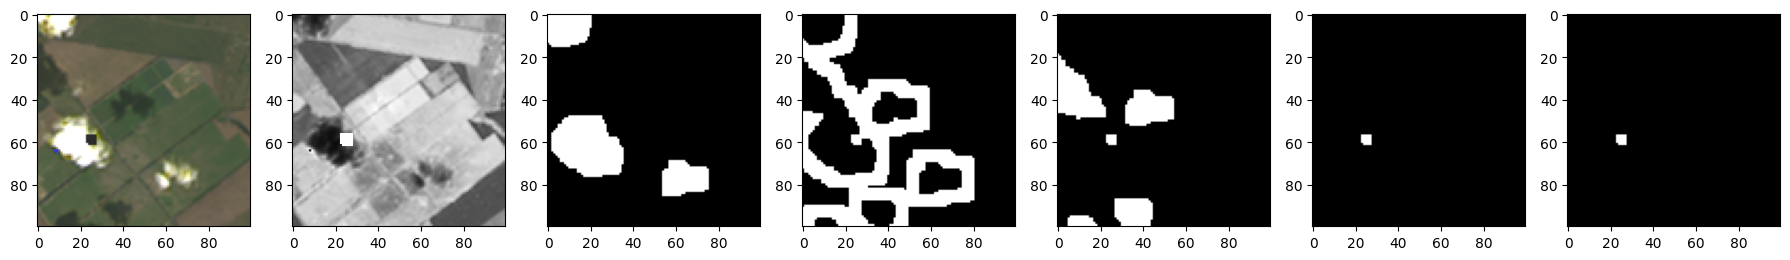

,Unnamed: 0,B01,B02,B03,B04,B05,B06,B07,B09,B10,...,aero,SAA,SZA,VAA,VZA,X,Y,DOY,NDVI,PID
0,3387000,4549.0,4719.0,4920.0,5081.0,6273.0,5768.0,4778.0,12.0,1642.0,...,3,14857,3503,22963,102,1500,925,211,0.104985,0
1,3387001,4478.0,4673.0,4984.0,5130.0,6303.0,5862.0,4818.0,10.0,1652.0,...,3,14857,3503,22975,102,1501,925,211,0.102598,100
2,3387002,3782.0,4098.0,4566.0,4705.0,6278.0,5710.0,4522.0,11.0,1661.0,...,3,14857,3503,22987,102,1502,925,211,0.143221,200
3,3387003,2727.0,3031.0,3900.0,3992.0,5997.0,5380.0,4112.0,13.0,1697.0,...,3,14858,3503,22999,102,1503,925,211,0.200721,300
4,3387004,913.0,1195.0,2436.0,2526.0,5051.0,4211.0,2974.0,9.0,1752.0,...,3,14858,3503,23011,102,1504,925,211,0.333245,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3749435,266.0,372.0,677.0,698.0,2116.0,2153.0,1268.0,8.0,2786.0,...,2,14862,3500,24222,123,1595,1024,211,0.503909,9599
9996,3749436,255.0,372.0,696.0,702.0,2172.0,2117.0,1237.0,9.0,2796.0,...,2,14862,3500,24230,123,1596,1024,211,0.511482,9699
9997,3749437,240.0,348.0,655.0,657.0,2141.0,2150.0,1263.0,12.0,2808.0,...,2,14862,3499,24238,123,1597,1024,211,0.530379,9799
9998,3749438,240.0,339.0,631.0,633.0,2149.0,2199.0,1298.0,11.0,2814.0,...,2,14862,3499,24247,123,1598,1024,211,0.544932,9899


Change columns list: ['Unnamed: 0', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11', 'cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero', 'SAA', 'SZA', 'VAA', 'VZA', 'X', 'Y', 'DOY', 'NDVI', 'PID']->['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID']
clear


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,343,591,594,2134,0,1526,925,211,2600
1,388,624,638,2201,0,1527,925,211,2700
2,390,646,643,2400,0,1528,925,211,2800
3,341,609,537,3157,0,1529,925,211,2900
4,309,583,470,3688,0,1530,925,211,3000
...,...,...,...,...,...,...,...,...,...
5365,372,677,698,2116,0,1595,1024,211,9599
5366,372,696,702,2172,0,1596,1024,211,9699
5367,348,655,657,2141,0,1597,1024,211,9799
5368,339,631,633,2149,0,1598,1024,211,9899


train_data [211]


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,343,591,594,2134,0,1526,925,211,2600
1,388,624,638,2201,0,1527,925,211,2700
2,390,646,643,2400,0,1528,925,211,2800
3,341,609,537,3157,0,1529,925,211,2900
4,309,583,470,3688,0,1530,925,211,3000
...,...,...,...,...,...,...,...,...,...
5365,372,677,698,2116,0,1595,1024,211,9599
5366,372,696,702,2172,0,1596,1024,211,9699
5367,348,655,657,2141,0,1597,1024,211,9799
5368,339,631,633,2149,0,1598,1024,211,9899


test_data


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID


to_impute:


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,NaN,NaN,NaN,NaN,NaN,1500,925,211,0
1,NaN,NaN,NaN,NaN,NaN,1501,925,211,100
2,NaN,NaN,NaN,NaN,NaN,1502,925,211,200
3,NaN,NaN,NaN,NaN,NaN,1503,925,211,300
4,NaN,NaN,NaN,NaN,NaN,1504,925,211,400
...,...,...,...,...,...,...,...,...,...
19,NaN,NaN,NaN,NaN,NaN,1527,985,211,2760
20,NaN,NaN,NaN,NaN,NaN,1524,986,211,2461
21,NaN,NaN,NaN,NaN,NaN,1525,986,211,2561
22,NaN,NaN,NaN,NaN,NaN,1526,986,211,2661


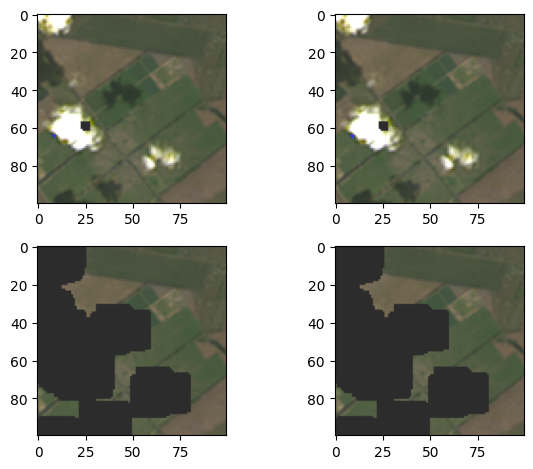

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 89,  89,  69],
         [ 89,  90,  69],
         [ 86,  87,  68]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 88,  90,  71],
         [ 86,  88,  69],
         [ 84,  86,  67]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 83,  86,  67],
         [ 82,  87,  67],
         [ 85,  88,  69]],
 
        ...,
 
        [[108,  97,  80],
         [106,  95,  78],
         [ 96,  88,  75],
         ...,
         [ 89,  89,  68],
         [ 86,  87,  67],
         [ 84,  86,  67]],
 
        [[107,  96,  79],
         [110,  98,  81],
         [102,  92,  77],
         ...,
         [ 90,  89,  69],
         [ 88,  88,  67],
         [ 86,  87,  67]],
 
        [[105,  95,  79],
         [106,  95,  80],
         [108,  96,  80],
         ...,
         [ 90,  90,  68],
  

In [9]:
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

print(f'NumPy version:{np.__version__}')
np.float = float # 'float32' # float
table_dtype = int   # np.float  #'float32'
print(table_dtype)

# hls_data = HLSDataSet(table_dtype = table_dtype)
hls_data = HLSInference(table_dtype = table_dtype)

# hls_data._REFLECTANCE(round=3)
# hls_data._QUANTIZATE(round=3)

# hls_data.clip_dataset(x1=50.0, y1=50.0, x2=100.0, y2=100.0)

doys = [171, 179, 187, 195, 203, 211, 219]
doys = [171, 179, 187, 203, 211, 219]
doys = [203, 211, 219]
doys = [211,]
df = hls_data._get_data_doys(doys = doys, SHOW=True)
display(df)

# df = hls_data._set_columns_name()
# display(df)

df1, df2 = hls_data._nan_9999()
# display(df1)
# display(df2)

df1, df2 = hls_data._set_clear_cloud()
# display(df1)
# display(df2)

data, nan, clear, cloud = hls_data._set_train_columns_name()

print('clear')
display(clear)

# train_data, test_data = hls_data._set_train_test_data(doy=211.0, x1=60.0, y1=40.0, x2=75.0, y2=55.0)

train_data, test_data = hls_data._set_train_test_data(doy=211.0, x1=45.0, y1=45.0, x2=50.0, y2=50.0, for_show_nan=False)
# train_data, test_data = hls_data._set_timeseries_train_test_data(doy=211.0, x1=50.0, y1=50.0, x2=100.0, y2=100.0)

print('train_data', train_data['DOY'].unique())
display(train_data)
print('test_data')
display(test_data)
# display(data)
# display(nan)
# display(clear)
# display(cloud)

to_impute = hls_data._to_impute()
hls_data._inference_train_test_data()
hls_data._inference_imshow()

# fn

In [10]:
def GetModel(train_data, experiment_dir = '', load_model_path = '', tokenizer='',):

    data = train_data.copy()
    # Get the DataFrame with columns in reverse order
    # data = data[data.columns[::-1]].copy()

    print(data.dtypes.tolist())
    # Reset the index to remove it
    data = data.reset_index(drop=True)
    display(data)

    # Get the current CPU time in seconds since the epoch
    current_time = int(time.time())
    # Use the current time as a seed for a random number generator
    random_seed_state = current_time  # You can use this random_state for various random processes

    step_checkpoint = 12000
    #### TRAINER HYPERPARAMETERS #############################
    save_steps = 1000
    logging_steps = 1
    
    epochs = 1
    batch_size = 1
    
    learning_rate = 1e-12
    lr_scheduler_type = 'constant'
    # lr_scheduler_type = 'cosine'
    num_cycles = 4
    
    warmup_steps = 5000
    
    optimizer = 'sophia'
    # optimizer = 'adamw_torch'
    ##########################################################

    efficient_finetuning = '' #'lora'

    print('experiment_dir :', experiment_dir)
    print('load_model_path:', load_model_path)

    # # load_model_path = 'load_model/checkpoint-16000'
    # model = GReaT(llm=load_model_path,
    #               # tokenizer=load_model_path,
    #               tokenizer=tokenizer,
    #               batch_size=batch_size, epochs=epochs, max_steps=1,
    #               logging_steps=logging_steps, save_steps=save_steps,
    #               # evaluation_strategy='steps',
    #               # dataloader_num_workers=2, #fp16=True,
    #               logging_first_step=True,
    #               save_total_limit=2,
    #               prediction_loss_only=True,
    #               experiment_dir=experiment_dir,
    #               dataloader_num_workers=2,
    #               efficient_finetuning = efficient_finetuning,
    #               learning_rate=learning_rate,
    #               lr_scheduler_type=lr_scheduler_type,
    #               warmup_steps = warmup_steps,
    #               num_cycles = num_cycles,
    #               # warmup_ratio=0.05,
    #               seed=current_time,
    #               data_seed=current_time+int(time.time()),
    #               # optim=TRAINER_DICT['optimizer'],
    #               fp16 = True,
    #               # torch_compile=True,   #### uncomment for Ampere
    #               # bf16=True,            #### uncomment for Ampere
    #               report_to='none',
    #               )

    model = GReaT(llm=load_model_path,
                  # tokenizer=load_model_path,
                  tokenizer=tokenizer,
                  # tokenizer=load_model_path,
                  auto_find_batch_size=True,
                  batch_size=1, epochs=epochs, max_steps = 1,
                  logging_steps=logging_steps, save_steps=save_steps,
                  # evaluation_strategy='steps',
                  logging_first_step=True,
                  save_total_limit=2,
                  # prediction_loss_only=True,
                  experiment_dir=experiment_dir,
                  dataloader_num_workers=4,
                  efficient_finetuning = efficient_finetuning,
                  learning_rate=learning_rate,
                  lr_scheduler_type=lr_scheduler_type,
                  warmup_steps = warmup_steps,
                  num_cycles = num_cycles,
                  # warmup_ratio=0.05,
                  seed=current_time,
                  data_seed=current_time+int(time.time()),
                  optimizer = optimizer,
                  # optim=TRAINER_DICT['optimizer'],
                  # fp16 = True,            #### comment for Ampere, for Volta
                  # torch_compile=True,   #### uncomment for Ampere
                  # bf16=True,            #### uncomment for Ampere
                  report_to='none',
                  # run_name=f'{EXP_NAME}/run[{TRAINER_RUN}]',
                  # evaluation_strategy="steps",
                  # eval_steps=logging_steps,
                  label_names=["DOY", "PID", "B02", "B03", "B04"],    
                  )

    # model.load_from_dir(f'{load_model_path}')
    # print(f'----------- Model architecture, efficient_finetuning: {efficient_finetuning} -----------------------')
    # print(model.model)
    # print(f'----------------------------------------------------------------------------------------------------')
    
    model.fit(data=data[0:2], test_data=data[0:2], conditional_col='DOY', resume_from_checkpoint=True)
    # model.fit(data[0:1])

    return model

# fn
# model.fit(data=train_data, test_data=test_data)

# TRAINER_DICT.to_csv(f'{experiment_dir}.csv')

In [11]:
!pwd


# i_run = 0

EXP_NAME = f'A0[RGB_REFL[int]3BAND]'
EXP_NAME = f'A0[RGB_ORIG[int]3BAND]'

EXP_NAME = f'A0[RGB_FAST[int]3BAND]'

EXP_NAME = f'A0[VIRTUAL_SAT]'

# EXP_NAME = f'A0[RGB_FULLTOK[int]3BAND]'

# EXP_NAME = f'A0[{MODEL_NAME}_FULLTOK[int]3BAND]'

# EXP_NAME = f'A0[RGB_ORIG[int]3BAND]'

# #### LISTS for TRAINER_RUN cycles POLYNOMIAL WITH WARMUP ###################################
# epochs_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# max_steps_list =    [150000, 108000, 10000, 20000, 20000, 20000, 20000, 20000]
# warmup_steps_list = [15000,  5000,  5000,      0,     0,     0,     0,     0]

# lr_scheduler_type_list = ['constant', 'constant', 'constant', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial' ]     # 'polynomial'      
# num_cycles = 3

# learning_rate_list = [1e-27, 1e-26, 1e-4, 1e-4, 7e-5, 2e-5, 7e-6, 2e-6]
# ########################################################################
step_checkpoint_list = [500000, 500000, 200000, 175000, 175000]



load_model_path_list = []
experiment_dir_list  = []

for i_run, chkpt in enumerate(step_checkpoint_list):
    experiment_dir_list.append(f'{EXP_NAME}/run[{i_run}]')
    load_model_path_list.append(f'{EXP_NAME}/run[{i_run}]/checkpoint-{chkpt}')
    # load_model_path_list.append(f'run[{i_run}]/model')

i_run = 1

print(load_model_path_list)

print('i_run:', i_run, load_model_path_list[i_run])

train_columns_list = ['B02', 'B03', 'B04', 'PID', 'DOY']

# # Create a new column 'BAND' by concatenating 'B02', 'B03', and 'B04' with ';'
# train_data['BAND'] = train_data.apply(lambda row: ';'.join([str(row['B02']), str(row['B03']), str(row['B04'])]), axis=1)
# train_columns_list = ['PID', 'DOY', 'BAND']

#### CODE DATA 4 TRAIN #####################################
# train_columns_list = ['PID', 'DOY', 'BAND']
train_columns_list = ['B02', 'B03', 'B04', 'PID', 'DOY']
# train_columns_list = ['B02', 'B03', 'B04', 'X', 'Y', 'DOY']
# train_columns_list = ['B03', 'PID', 'DOY']
# data = train_data[train_columns_list].copy()

# train_data['B02'] = train_data['B02'] * 1000
# train_data['B03'] = train_data['B03'] * 1000
# train_data['B04'] = train_data['B04'] * 1000
# train_data = train_data.astype(int)
################################

# i_run = 0
model = GetModel(train_data[train_columns_list], 
                 experiment_dir = experiment_dir_list[i_run], 
                 load_model_path = load_model_path_list[i_run], 
                 # tokenizer=load_model_path_list[i_run],)
                 # tokenizer=f"{EXP_NAME}/aispace-tokenizer")
                 tokenizer=f"distilgpt2")
# model = []

recovered_data = hls_data._impute(model=model, k=10000, max_length=33, temperature=1e-32) #, device='cpu')

imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
hls_data._save_recovered(imputed_file=imputed_file)

imputed_file = f'{EXP_NAME}/imputed_output_run[{i_run}].csv'
hls_data._save_imputed(imputed_file=imputed_file)

/home
['A0[VIRTUAL_SAT]/run[0]/checkpoint-500000', 'A0[VIRTUAL_SAT]/run[1]/checkpoint-500000', 'A0[VIRTUAL_SAT]/run[2]/checkpoint-200000', 'A0[VIRTUAL_SAT]/run[3]/checkpoint-175000', 'A0[VIRTUAL_SAT]/run[4]/checkpoint-175000']
i_run: 1 A0[VIRTUAL_SAT]/run[1]/checkpoint-500000
[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


,B02,B03,B04,PID,DOY
0,343,591,594,2600,211
1,388,624,638,2700,211
2,390,646,643,2800,211
3,341,609,537,2900,211
4,309,583,470,3000,211
...,...,...,...,...,...
5365,372,677,698,9599,211
5366,372,696,702,9699,211
5367,348,655,657,9799,211
5368,339,631,633,9899,211


experiment_dir : A0[VIRTUAL_SAT]/run[1]
load_model_path: A0[VIRTUAL_SAT]/run[1]/checkpoint-500000


Optimiser: 2nd order - Sophia
self.train_hyperparameters: {'auto_find_batch_size': True, 'logging_steps': 1, 'save_steps': 1000, 'logging_first_step': True, 'save_total_limit': 2, 'dataloader_num_workers': 4, 'learning_rate': 1e-12, 'lr_scheduler_type': 'constant', 'warmup_steps': 5000, 'seed': 1704528903, 'data_seed': 3409057806, 'report_to': 'none', 'label_names': ['DOY', 'PID', 'B02', 'B03', 'B04']}
total_train_steps calculated: 1 2 1
warmup_steps: 5000
lr_scheduler_type: constant


wandb: Currently logged in as: koya09ua (koyaua). Use `wandb login --relogin` to force relogin


wandb: Network error (TransientError), entering retry loop.


Step,Training Loss


to impute data:


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,NaN,NaN,NaN,NaN,NaN,1500,925,211,0
1,NaN,NaN,NaN,NaN,NaN,1501,925,211,100
2,NaN,NaN,NaN,NaN,NaN,1502,925,211,200
3,NaN,NaN,NaN,NaN,NaN,1503,925,211,300
4,NaN,NaN,NaN,NaN,NaN,1504,925,211,400
...,...,...,...,...,...,...,...,...,...
4625,NaN,NaN,NaN,NaN,NaN,1527,985,211,2760
4626,NaN,NaN,NaN,NaN,NaN,1524,986,211,2461
4627,NaN,NaN,NaN,NaN,NaN,1525,986,211,2561
4628,NaN,NaN,NaN,NaN,NaN,1526,986,211,2661


,B02,B03,B04,B05,NDVI,X,Y,DOY,PID
0,343,591,594,2134,0,1526,925,211,2600
1,388,624,638,2201,0,1527,925,211,2700
2,390,646,643,2400,0,1528,925,211,2800
3,341,609,537,3157,0,1529,925,211,2900
4,309,583,470,3688,0,1530,925,211,3000
...,...,...,...,...,...,...,...,...,...
5365,372,677,698,2116,0,1595,1024,211,9599
5366,372,696,702,2172,0,1596,1024,211,9699
5367,348,655,657,2141,0,1597,1024,211,9799
5368,339,631,633,2149,0,1598,1024,211,9899


NumPy version:1.26.1
IMPUTE:


,PID,DOY,B02,B03,B04
0,0,211,NaN,NaN,NaN
1,100,211,NaN,NaN,NaN
2,200,211,NaN,NaN,NaN
3,300,211,NaN,NaN,NaN
4,400,211,NaN,NaN,NaN
...,...,...,...,...,...
4625,2760,211,NaN,NaN,NaN
4626,2461,211,NaN,NaN,NaN
4627,2561,211,NaN,NaN,NaN
4628,2661,211,NaN,NaN,NaN


100%|██████████| 4630/4630 [17:08<00:00,  4.50it/s]


IMPUTED:


,B02,B03,B04,PID,DOY
0,333.0,613.0,547.0,0.0,211.0
1,464.0,730.0,864.0,100.0,211.0
2,339.0,614.0,547.0,200.0,211.0
3,521.0,881.0,965.0,300.0,211.0
4,339.0,614.0,547.0,400.0,211.0
...,...,...,...,...,...
4625,282.0,668.0,477.0,2760.0,211.0
4626,322.0,727.0,521.0,2461.0,211.0
4627,322.0,727.0,521.0,2561.0,211.0
4628,322.0,714.0,521.0,2661.0,211.0


Index(['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID'], dtype='object') Index(['B02', 'B03', 'B04', 'PID', 'DOY'], dtype='object')
(4630, 9) (4630, 5)
Index(['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID'], dtype='object') Index(['B02', 'B03', 'B04', 'B05', 'NDVI', 'X', 'Y', 'DOY', 'PID'], dtype='object')
(4630, 9) (4630, 9)
imputed_data


,PID,DOY,Y,X,NDVI,B05,B04,B03,B02
0,0,211,925,1500,NaN,NaN,547.0,613.0,333.0
1,100,211,925,1501,NaN,NaN,864.0,730.0,464.0
2,200,211,925,1502,NaN,NaN,547.0,614.0,339.0
3,300,211,925,1503,NaN,NaN,965.0,881.0,521.0
4,400,211,925,1504,NaN,NaN,547.0,614.0,339.0
...,...,...,...,...,...,...,...,...,...
4625,2760,211,985,1527,NaN,NaN,477.0,668.0,282.0
4626,2461,211,986,1524,NaN,NaN,521.0,727.0,322.0
4627,2561,211,986,1525,NaN,NaN,521.0,727.0,322.0
4628,2661,211,986,1526,NaN,NaN,521.0,714.0,322.0


recovered_data


,PID,DOY,Y,X,NDVI,B05,B04,B03,B02
0,0,211,925,1500,NaN,NaN,547.0,613.0,333.0
1,100,211,925,1501,NaN,NaN,864.0,730.0,464.0
2,200,211,925,1502,NaN,NaN,547.0,614.0,339.0
3,300,211,925,1503,NaN,NaN,965.0,881.0,521.0
4,400,211,925,1504,NaN,NaN,547.0,614.0,339.0
...,...,...,...,...,...,...,...,...,...
9995,9599,211,1024,1595,0.0,2116.0,698.0,677.0,372.0
9996,9699,211,1024,1596,0.0,2172.0,702.0,696.0,372.0
9997,9799,211,1024,1597,0.0,2141.0,657.0,655.0,348.0
9998,9899,211,1024,1598,0.0,2149.0,633.0,631.0,339.0


A0[VIRTUAL_SAT]/recovered_output_run[1].csv
A0[VIRTUAL_SAT]/imputed_output_run[1].csv


A0[VIRTUAL_SAT]/recovered_output_run[1].csv
recovered_data


,PID,DOY,Y,X,NDVI,B05,B04,B03,B02
0,0,211,925,1500,NaN,NaN,547.0,613.0,333.0
1,100,211,925,1501,NaN,NaN,864.0,730.0,464.0
2,200,211,925,1502,NaN,NaN,547.0,614.0,339.0
3,300,211,925,1503,NaN,NaN,965.0,881.0,521.0
4,400,211,925,1504,NaN,NaN,547.0,614.0,339.0
...,...,...,...,...,...,...,...,...,...
9995,9599,211,1024,1595,0.0,2116.0,698.0,677.0,372.0
9996,9699,211,1024,1596,0.0,2172.0,702.0,696.0,372.0
9997,9799,211,1024,1597,0.0,2141.0,657.0,655.0,348.0
9998,9899,211,1024,1598,0.0,2149.0,633.0,631.0,339.0


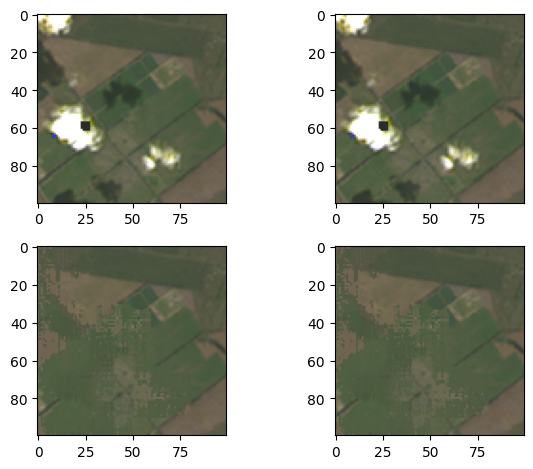

A0[VIRTUAL_SAT]/recovered_output_run[0].csv


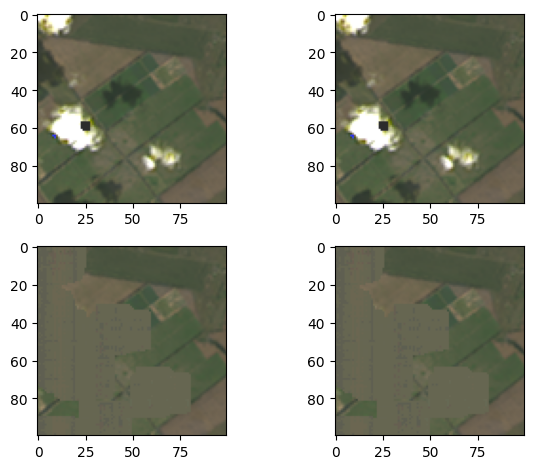

A0[VIRTUAL_SAT]/recovered_output_run[1].csv


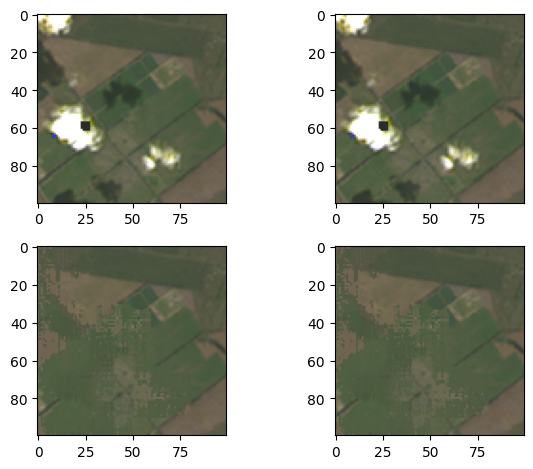

A0[VIRTUAL_SAT]/recovered_output_run[2].csv


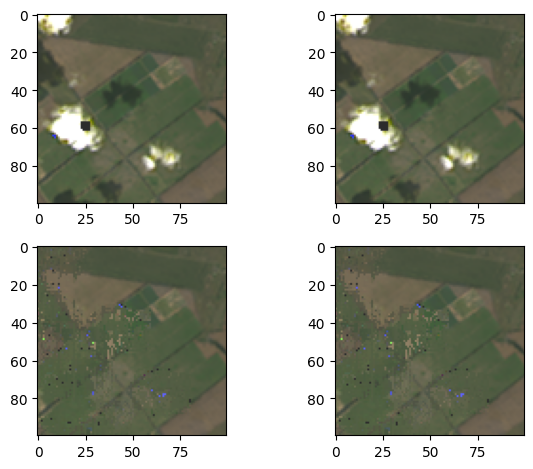

A0[VIRTUAL_SAT]/recovered_output_run[3].csv


FileNotFoundError: [Errno 2] No such file or directory: 'A0[VIRTUAL_SAT]/recovered_output_run[3].csv'

In [12]:

i_run=1

# imputed_file = f'{experiment_dir}/imputed_output_run[{i_run}].csv'
# imputed_data = hls_data._read_imputed(imputed_file)

imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
recovered_data = hls_data._read_recovered(imputed_file)

# display(imputed_data)
print('recovered_data')
display(recovered_data)

hls_data._set_inference_recovered()
hls_data._inference_imshow()

# fn
# experiment_dir = 'A0[shuf_sophia]'
# experiment_dir = 'A0[great_sophia]'
imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
for i_run in range(0,4):
    imputed_file = f'{EXP_NAME}/recovered_output_run[{i_run}].csv'
    recovered_data = hls_data._read_recovered(imputed_file)
    
    hls_data._set_inference_recovered()
    hls_data._inference_imshow()
# display(recovered_data)
# recovered_data = pd.read_csv(imputed_file)

# display(recovered_data)

In [ ]:
# hls_data._imputed_data(recovered_data)

hls_data._set_inference_recovered()

# hls_data._inference_train_test_data()
hls_data._inference_imshow()

In [ ]:
fn

In [ ]:
# #### TEST METRICS ##################
# nan_data = test_data.copy()
# nan_data = nan_data.reset_index(drop=True)

# print(nan_data.dtypes.tolist())

# display(nan_data)
# print(nan_data.columns)
# # fn

# print(f'NumPy version:{np.__version__}')
# np.float = float

# imputed_data = model.impute(nan_data, k=256, max_length=50000, temperature=0.01) #, device='cpu')
# imputed_data.to_csv('test_imputed_output.csv')

# # imputed_data = pd.read_csv('imputed_output.csv')
# # ######### CLEAR UNNAMED COLUMNS FROM DATASETS #######################################
# # imputed_data = imputed_data.loc[:, ~imputed_data.columns.str.contains('^Unnamed')]

In [ ]:
fn

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
fn

In [ ]:
fn